In [12]:
%load_ext autoreload
%autoreload 2

import sys, os, multiprocessing
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

import pandas as pd
from hydra.model.force_encoder_ecto import ForceEncoderEcto
from hydra.model.force_encoder_endo import ForceEncoderEndo
import hydra.model.helper as helper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
# Encode the calium into force

FILENAME = "2020-05-26-13-27-14-097356"

encoder = ForceEncoderEcto

calcium = pd.read_hdf("./results/data/calcium/" + FILENAME + ".h5")
calcium = calcium.values.reshape(len(calcium), 200, 200)
force = helper.encode_force_2d(encoder, calcium, 200, 200, 0.02)

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:23<00:00, 59.77it/s]


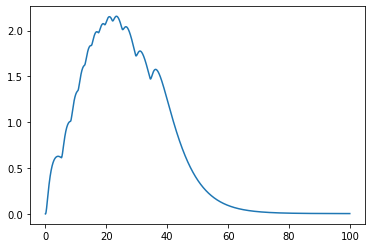

In [46]:
# Test on one cell
force_single = ForceEncoderEcto.encode(calcium[:, 0, 0], 0.02)
plt.plot(np.arange(0,100,0.02), force_single)
plt.show()

In [49]:
# Average the force and save
force_averaged = helper.average_force(force, 200, 200)
df = pd.DataFrame(force_averaged.reshape(-1, 400))
df.to_csv("./results/data/force/" + FILENAME + ".csv", index = False)
del force